## Image Processing Assignment 2
<br/>Python uses library called skimage to do the image rendering 

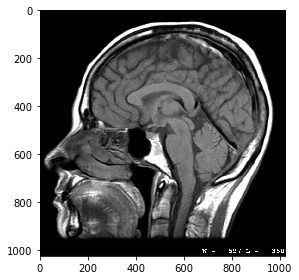

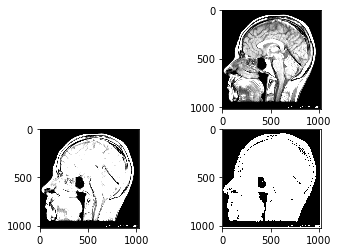

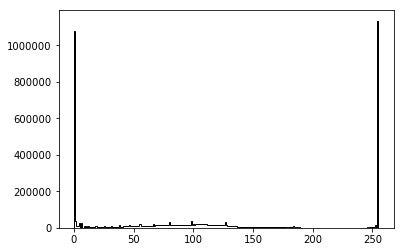

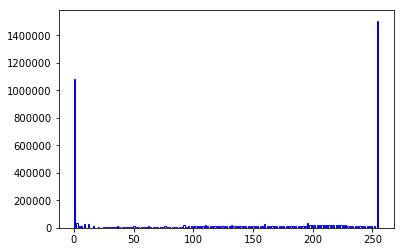

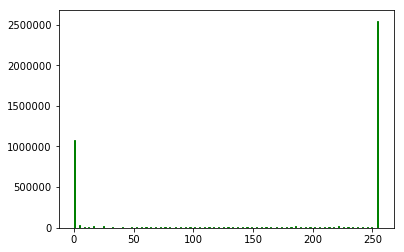

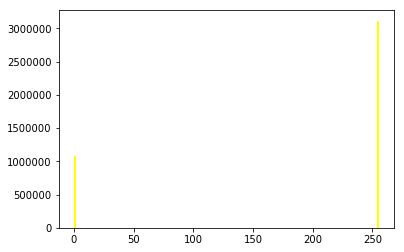

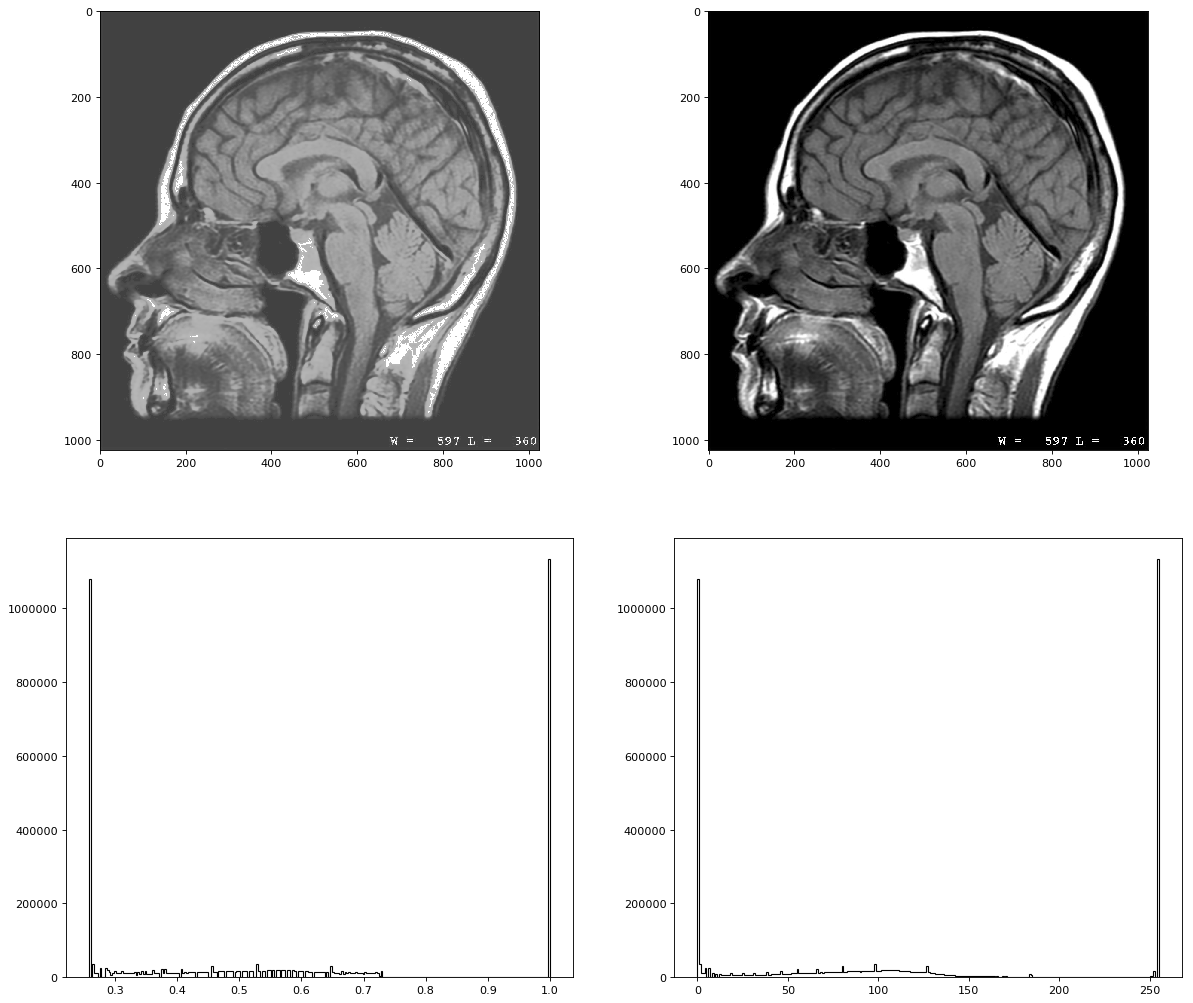

In [1]:
#There is no change in this piece of code 
%matplotlib inline
%config IPCompleter.greedy=True
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

brainimageText = 'braincomplete.png'
brainimage = novice.open(brainimageText)
brainimage.show()
brainImageArray = mpimg.imread(brainimageText,'True')
plt.imshow(brainImageArray)
Jm=exposure.rescale_intensity(brainImageArray,in_range=(0, pow(2,7)-1)) #reducing encoding
Km=exposure.rescale_intensity(brainImageArray,in_range=(0, pow(2,6)-1)) #reducing encoding
Lm=exposure.rescale_intensity(brainImageArray,in_range=(0, pow(2,1)-1)) #reducing to 1 bit
plt.subplot(222)
plt.imshow(Jm)
plt.subplot(223)
plt.imshow(Km)
plt.subplot(224)
plt.imshow(Lm)    

plt.figure()
ht=plt.hist(brainImageArray.ravel(), bins=256, histtype='step', color='black')
plt.figure()
ht=plt.hist(Jm.ravel(), bins=256, histtype='step', color='blue')
plt.figure()
ht=plt.hist(Km.ravel(), bins=256, histtype='step', color='green')
plt.figure()
ht=plt.hist(Lm.ravel(), bins=256, histtype='step', color='yellow')

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
img_eq = exposure.equalize_hist(brainImageArray)
plt.subplot(221)
plt.imshow(img_eq)
plt.subplot(222)
plt.imshow(brainImageArray)
plt.subplot(223)
ht=plt.hist(img_eq.ravel(), bins=256, histtype='step', color='black')
plt.subplot(224)
ht=plt.hist(brainImageArray.ravel(), bins=256, histtype='step', color='black')


#### Question No 2 <br/>
**equalize hist** : This function is a part of the module exposure which is part of the skiimage library in python . The main purpose of this function is to return an image after the histogram equalization .The equalize hist is defined as the follows:
equalize_hist(image, nbins=256, mask=None) [2]

**Parameters**
(Parameter_Name:Data_Type) <br/>
image: array <br/>
nbins : int (optional, no of bins for image histograms) <br/>
mask: ndarray of bools or 0s and 1s (optional, Array of same shape as image) <br/>

Return Parameter
out: float array [1] <br/>

#### Question No 3 <br/>
**equalize_adapthist** :This function is also a part of the module exposure in ski-image library or package . This function is used to enhance the local details when the part of the image is either lighter or darker than different parts of the image. This uses CLAHE (Contrast Limited Adaptive Histogram Equalization) algorithm.[3] The equalize_adapthist is defined as below . <br/>
equalize_adapthist(image, kernel_size=None, clip_limit=0.01, nbins=256)

**Parameters**

(Parameter_Name:Data_Type) <br/>

**image**: n dimensional array <br/>
**kernel_size**: integer or list-like ( optional) <br/>
**clip_limit** : float (optional Normalized between 0 to 1 , higher the value gives better contrast) <br/>
nbins : int  (optional) <br/>

Return Parameter <br/> 
out: n dimensional array (Equalized image) <br/>

The main difference between the approach of the standard histogram equalization and adaptive histogram equalization is the approach of how to operate on the image . In standard histogram equalization it operates on the whole image while in adaptive image it divides the image into tiles and operates on tiles individually [4]. The main advantage of adaptive equalization histogram is that it enhances the detail of the image significantly where the image are in the shadows . In the current example 
we use the adaptive histogram equalization when we want to enhance some parts of the brain for example the edge parts. The adaptive method is more useful as we can also enhance tile by tile to view the desired part of the brain. 
  



C:\Users\shreyas prasadh\Anaconda2\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


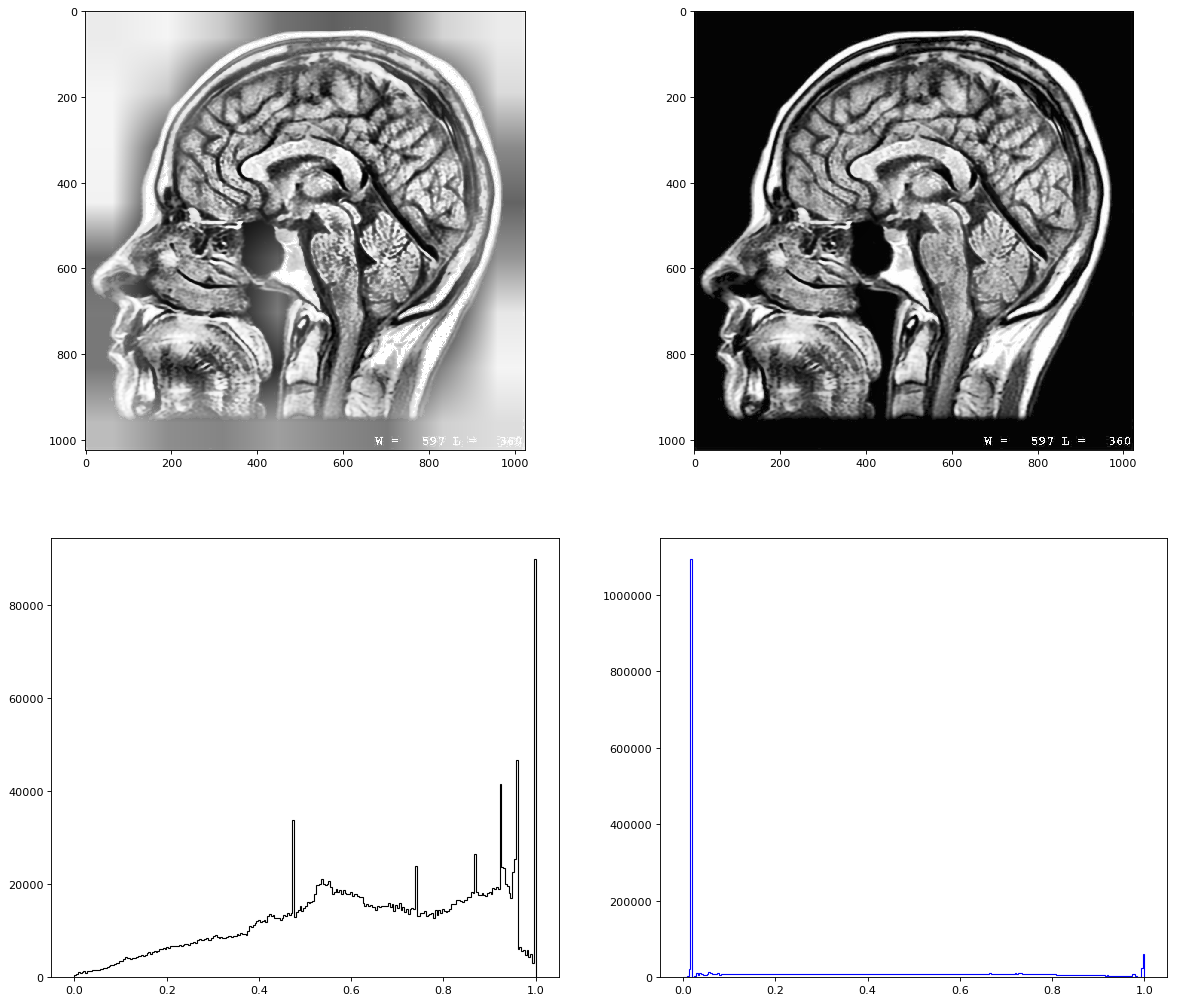

In [2]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
img_adapteq = exposure.equalize_adapthist(brainImageArray, clip_limit=1.00) #This is the new clip limit used
img_adapteq_different_Lim = exposure.equalize_adapthist(brainImageArray, clip_limit=0.02) #This is the original clip limit used

plt.subplot(221)
plt.imshow(img_adapteq)
plt.subplot(222)
plt.imshow(img_adapteq_different_Lim)
plt.subplot(223)
ht=plt.hist(img_adapteq.ravel(), bins=256, histtype='step', color='black')
plt.subplot(224)
ht=plt.hist(img_adapteq_different_Lim.ravel(), bins=256, histtype='step', color='blue')

#the main difference is in the image clarity as we can see the difference between them in the below image(the higher the limit
#the better the image clarity )

 ## References
1. ski image doc, http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist <br/>
2. Github.com , https://github.com/scikit-image/scikit-image/blob/master/skimage/exposure/exposure.py#L133 <br/>
3. Ski Image Doc , http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_adapthist <br/>
4. Digital Image processing using MATLAB, Rafael C. Gonzalez, Richard E. Woods, Steven L. Eddins,Gatesmark Pub., c2009 2nd ed Page No 105-107.